In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
from functools import reduce

# Total dwellings

In [9]:
# First the data of all available dwellings in 2021, with or without people

total = pd.read_csv('total_dwellings.csv')

In [10]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MSOA21CD   1006 non-null   object 
 1   Dwellings  1002 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [11]:
total.tail(10)

,MSOA21CD,Dwellings
999,E02000981,5326.0
1000,E02000982,5066.0
1001,E02000983,4943.0
1002,NaN,NaN
1003,NaN,NaN
1004,NaN,NaN
1005,In order to protect against disclosure of pers...,NaN
1006,have been swapped between different geographic...,NaN
1007,by small amounts. Small counts at the lowest g...,NaN
1008,affected.,NaN


When merged by MSOA21CD the last rows drop (NaNs)

# Tenure

In [12]:
tenure = pd.read_csv('Tenure.csv')

In [13]:
tenure.head()

,MSOA21CD,Owned-Outright,Own-mortgage,Own-Share,Social-rent,Private-rent,Rent-free
0,E02000002,507.0,729.0,10.0,1199.0,417.0,8.0
1,E02000003,942.0,1244.0,24.0,522.0,1197.0,1.0
2,E02000004,649.0,894.0,16.0,373.0,376.0,1.0
3,E02000005,582.0,1300.0,47.0,912.0,779.0,8.0
4,E02000007,474.0,979.0,60.0,1552.0,602.0,9.0


In [14]:
tenure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSOA21CD        1002 non-null   object 
 1   Owned-Outright  1002 non-null   float64
 2   Own-mortgage    1002 non-null   float64
 3   Own-Share       1002 non-null   float64
 4   Social-rent     1002 non-null   float64
 5   Private-rent    1002 non-null   float64
 6   Rent-free       1002 non-null   float64
dtypes: float64(6), object(1)
memory usage: 54.9+ KB


In [15]:
dten = tenure.merge(total, on= 'MSOA21CD')

In [16]:
dten.tail()

,MSOA21CD,Owned-Outright,Own-mortgage,Own-Share,Social-rent,Private-rent,Rent-free,Dwellings
997,E02000979,676.0,381.0,27.0,1134.0,1708.0,1.0,5612.0
998,E02000980,665.0,435.0,53.0,1847.0,1308.0,16.0,5569.0
999,E02000981,694.0,575.0,34.0,1141.0,1711.0,2.0,5326.0
1000,E02000982,467.0,326.0,58.0,1824.0,1155.0,14.0,5066.0
1001,E02000983,484.0,310.0,19.0,1517.0,1412.0,18.0,4943.0


In [17]:
# Sum all households in tenure dataset gives the total of occupied dwellings

dten['occupied'] = dten.iloc[:, -7:-1].sum(axis=1)

In [18]:
dten.head()

,MSOA21CD,Owned-Outright,Own-mortgage,Own-Share,Social-rent,Private-rent,Rent-free,Dwellings,occupied
0,E02000002,507.0,729.0,10.0,1199.0,417.0,8.0,2951.0,2870.0
1,E02000003,942.0,1244.0,24.0,522.0,1197.0,1.0,4111.0,3930.0
2,E02000004,649.0,894.0,16.0,373.0,376.0,1.0,2388.0,2309.0
3,E02000005,582.0,1300.0,47.0,912.0,779.0,8.0,3769.0,3628.0
4,E02000007,474.0,979.0,60.0,1552.0,602.0,9.0,3797.0,3676.0


### Getting empty dwellings

In [19]:
dten.loc[:,'empty'] = dten['Dwellings'] - dten['occupied']

In [20]:
dten.head()

,MSOA21CD,Owned-Outright,Own-mortgage,Own-Share,Social-rent,Private-rent,Rent-free,Dwellings,occupied,empty
0,E02000002,507.0,729.0,10.0,1199.0,417.0,8.0,2951.0,2870.0,81.0
1,E02000003,942.0,1244.0,24.0,522.0,1197.0,1.0,4111.0,3930.0,181.0
2,E02000004,649.0,894.0,16.0,373.0,376.0,1.0,2388.0,2309.0,79.0
3,E02000005,582.0,1300.0,47.0,912.0,779.0,8.0,3769.0,3628.0,141.0
4,E02000007,474.0,979.0,60.0,1552.0,602.0,9.0,3797.0,3676.0,121.0


### Counts stats

In [21]:
dten.describe(include= [np.number])

,Owned-Outright,Own-mortgage,Own-Share,Social-rent,Private-rent,Rent-free,Dwellings,occupied,empty
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,708.645709,836.820359,52.386228,789.407186,1023.477046,6.354291,3708.297405,3417.090818,291.206587
std,341.091647,328.663299,53.679754,572.119482,474.398076,6.511898,866.922075,718.180277,332.509927
min,75.000000,133.000000,2.000000,39.000000,130.000000,0.000000,2124.000000,2029.000000,47.000000
25%,448.750000,569.000000,18.000000,342.250000,684.250000,2.000000,3083.000000,2891.750000,131.250000
50%,669.500000,820.500000,34.000000,648.500000,979.500000,5.000000,3581.000000,3317.000000,201.000000
75%,915.750000,1069.750000,66.000000,1128.000000,1302.750000,9.000000,4217.750000,3862.750000,315.750000
max,2213.000000,1826.000000,360.000000,3248.000000,2826.000000,73.000000,7323.000000,6007.000000,3567.000000


### Percentages

In [22]:
def percentage(divisor,columns,heading,df):
    return df.join(df[columns].div(df[divisor], axis=0).mul(100).add_prefix(heading))

In [23]:
cols = dten.columns.values[1:7]

In [24]:
cols

array(['Owned-Outright', 'Own-mortgage', 'Own-Share', 'Social-rent',
       'Private-rent', 'Rent-free'], dtype=object)

In [25]:
dt_new = percentage("Dwellings",cols,"%_",dten)

In [26]:
dt_new.loc[:,'Empty %'] = (dten['empty']) * 100 / dten['Dwellings']

In [27]:
dt_new.head()

,MSOA21CD,Owned-Outright,Own-mortgage,Own-Share,Social-rent,Private-rent,Rent-free,Dwellings,occupied,empty,%_Owned-Outright,%_Own-mortgage,%_Own-Share,%_Social-rent,%_Private-rent,%_Rent-free,Empty %
0,E02000002,507.0,729.0,10.0,1199.0,417.0,8.0,2951.0,2870.0,81.0,17.180617,24.703490,0.338868,40.630295,14.130803,0.271095,2.744832
1,E02000003,942.0,1244.0,24.0,522.0,1197.0,1.0,4111.0,3930.0,181.0,22.914133,30.260277,0.583800,12.697640,29.117003,0.024325,4.402822
2,E02000004,649.0,894.0,16.0,373.0,376.0,1.0,2388.0,2309.0,79.0,27.177554,37.437186,0.670017,15.619765,15.745394,0.041876,3.308208
3,E02000005,582.0,1300.0,47.0,912.0,779.0,8.0,3769.0,3628.0,141.0,15.441762,34.491908,1.247015,24.197400,20.668612,0.212258,3.741045
4,E02000007,474.0,979.0,60.0,1552.0,602.0,9.0,3797.0,3676.0,121.0,12.483540,25.783513,1.580195,40.874375,15.854622,0.237029,3.186726


In [28]:
dt_new.columns.values

array(['MSOA21CD', 'Owned-Outright', 'Own-mortgage', 'Own-Share',
       'Social-rent', 'Private-rent', 'Rent-free', 'Dwellings',
       'occupied', 'empty', '%_Owned-Outright', '%_Own-mortgage',
       '%_Own-Share', '%_Social-rent', '%_Private-rent', '%_Rent-free',
       'Empty %'], dtype=object)

In [29]:
dtenr = dt_new[['MSOA21CD','%_Owned-Outright', '%_Own-mortgage','%_Own-Share', 
                '%_Social-rent', '%_Private-rent', '%_Rent-free','Empty %']]

In [30]:
dtenr.head()

,MSOA21CD,%_Owned-Outright,%_Own-mortgage,%_Own-Share,%_Social-rent,%_Private-rent,%_Rent-free,Empty %
0,E02000002,17.180617,24.703490,0.338868,40.630295,14.130803,0.271095,2.744832
1,E02000003,22.914133,30.260277,0.583800,12.697640,29.117003,0.024325,4.402822
2,E02000004,27.177554,37.437186,0.670017,15.619765,15.745394,0.041876,3.308208
3,E02000005,15.441762,34.491908,1.247015,24.197400,20.668612,0.212258,3.741045
4,E02000007,12.483540,25.783513,1.580195,40.874375,15.854622,0.237029,3.186726


In [31]:
dtenr.describe()

,%_Owned-Outright,%_Own-mortgage,%_Own-Share,%_Social-rent,%_Private-rent,%_Rent-free,Empty %
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,20.047222,23.337318,1.335191,20.861172,27.031772,0.171490,7.215834
std,10.421905,9.295707,1.171913,13.800955,9.489760,0.168584,5.914781
min,1.967987,3.629090,0.060606,1.273262,4.858300,0.000000,1.903605
25%,11.916291,15.879979,0.523552,9.915181,20.105213,0.052722,3.988298
50%,18.189436,23.331544,0.963094,18.133825,27.481170,0.129632,5.634394
75%,26.800507,30.439572,1.736887,29.787389,33.297560,0.240574,8.017262
max,52.334313,50.088080,7.571947,67.607906,61.255327,1.125328,52.905095


#### empty dwellings max

In [32]:
dtenr.loc[dtenr['Empty %'].idxmax()]

MSOA21CD            E02000978
%_Owned-Outright    16.306015
%_Own-mortgage        6.83251
%_Own-Share          0.238541
%_Social-rent        1.482365
%_Private-rent      22.201397
%_Rent-free          0.034077
Empty %             52.905095
Name: 996, dtype: object

MSOA E02000978 = Westminster 019: area comprising Hyde Park, Belgravia, Knightsbridge.
(Source: https://mapit.mysociety.org/area/34857.html)

In [33]:
dten.loc[dten['empty'].idxmax()]

MSOA21CD          E02000977
Owned-Outright        561.0
Own-mortgage          254.0
Own-Share              13.0
Social-rent           821.0
Private-rent         1781.0
Rent-free               2.0
Dwellings            6999.0
occupied             3432.0
empty                3567.0
Name: 995, dtype: object

MSOA E02000977 = Westminster 018: area between Mayfair and Aldwych. 
(Source: https://mapit.mysociety.org/area/34856.html)

### Visualisations

<Axes: >

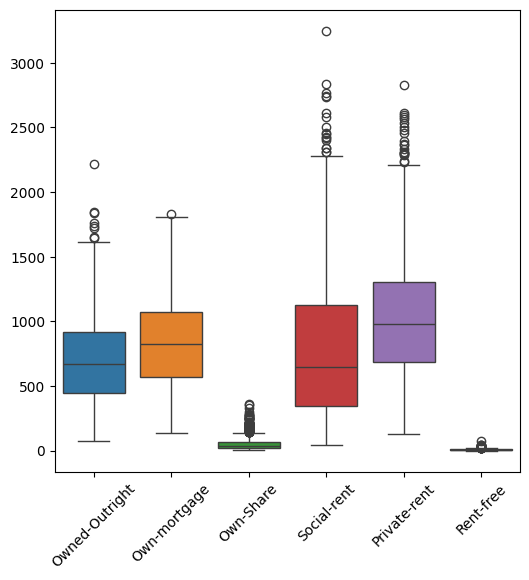

In [34]:
fig, axes = plt.subplots(figsize=(6,6))
plt.xticks(rotation=45)
sns.boxplot(tenure)

<Axes: >

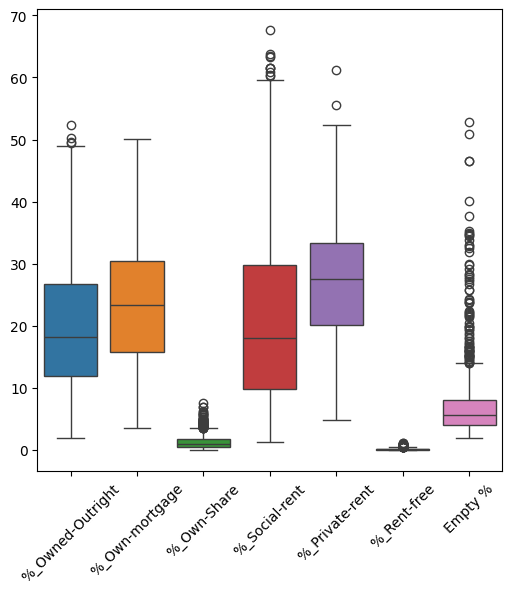

In [35]:
fig, axes = plt.subplots(figsize=(6,6))
plt.xticks(rotation=45)
sns.boxplot(dtenr)

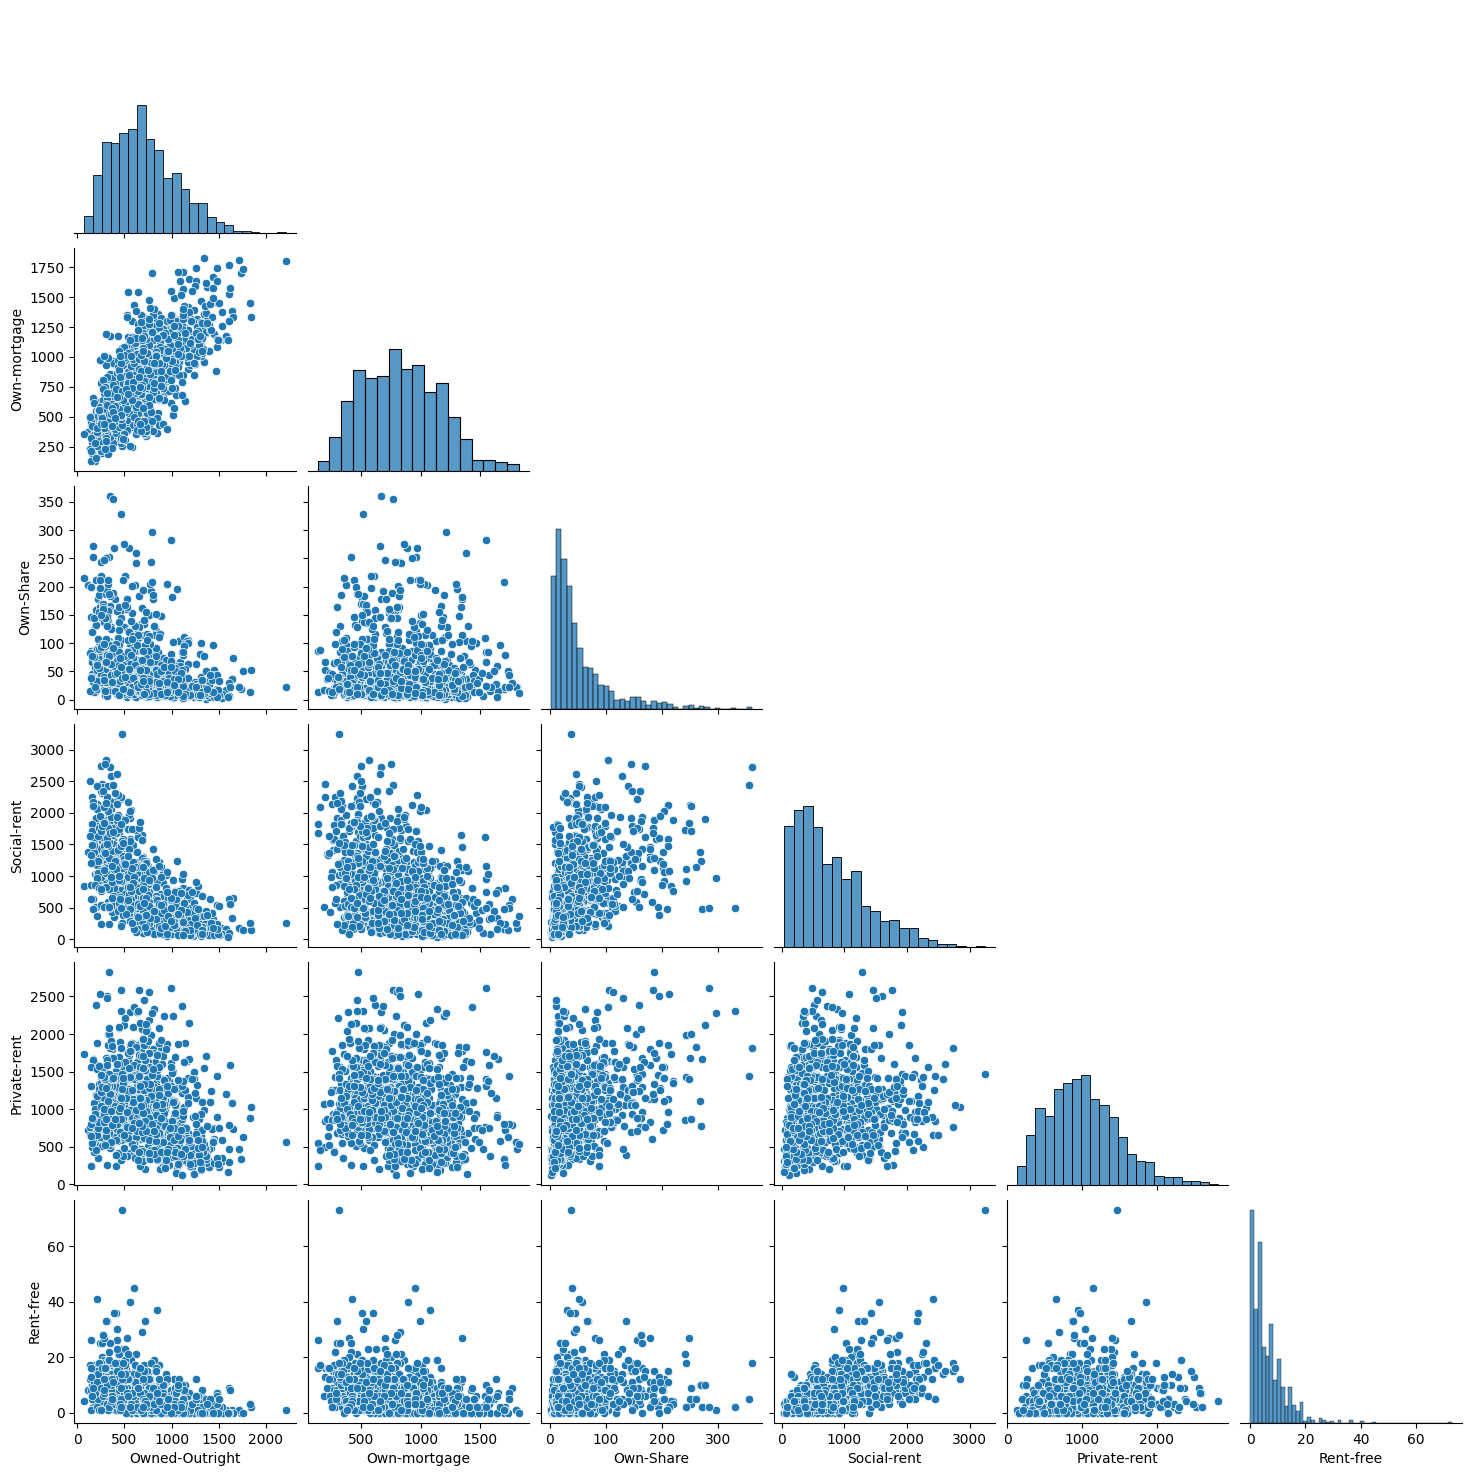

In [36]:
sns.pairplot(tenure, kind='scatter', corner=True)

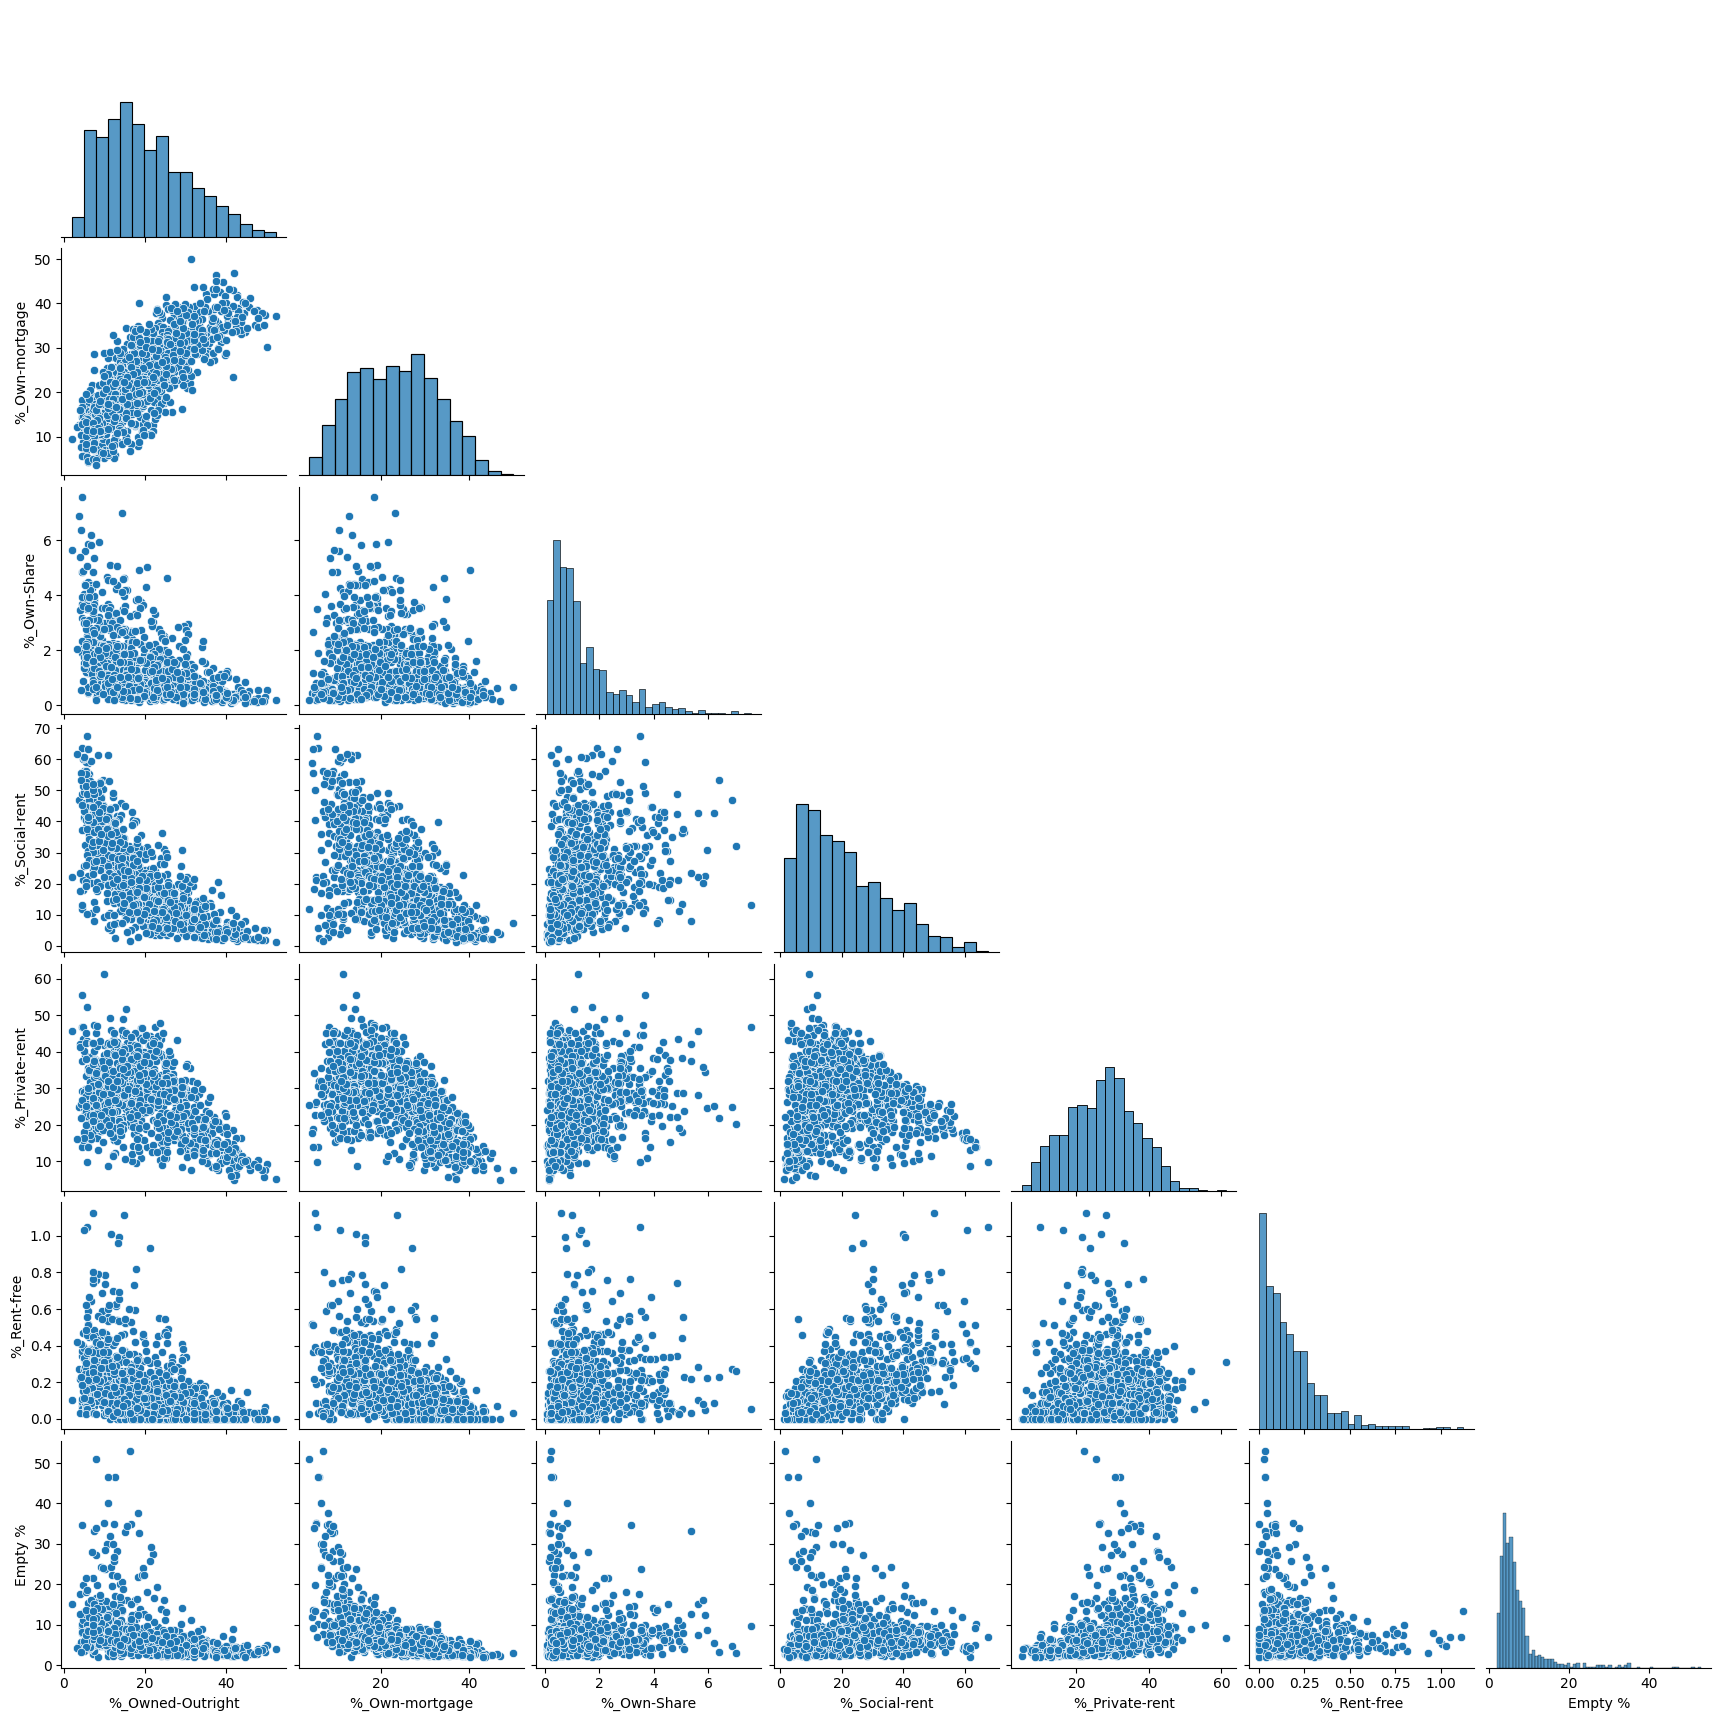

In [37]:
sns.pairplot(dtenr, kind='scatter', corner=True)

#### Correlations between tenure variables

In [38]:
dten_num = tenure.select_dtypes(include= ['float64'])

In [39]:
corr_ten = dten_num.corr()

<Axes: >

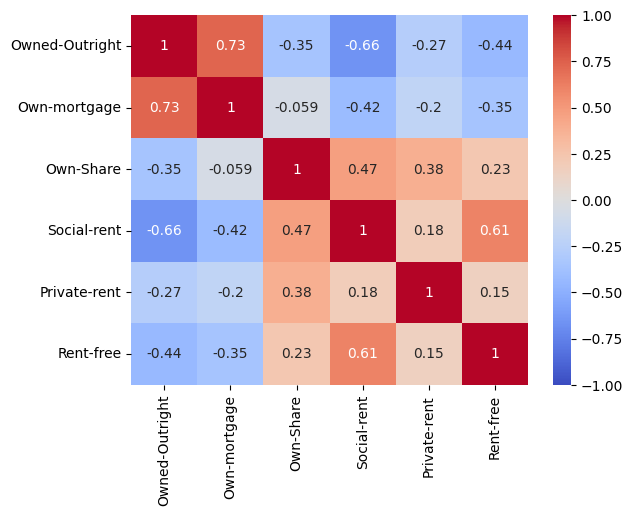

In [40]:
sns.heatmap(corr_ten, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

In [41]:
dtr_num = dtenr.select_dtypes(include= ['float64'])

In [42]:
# Correlations between tenure percentages

corr_dtr = dtr_num.corr()

<Axes: >

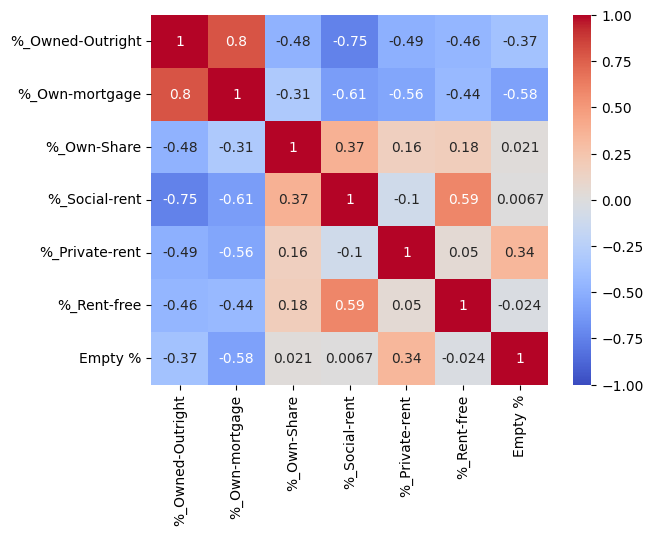

In [43]:
sns.heatmap(corr_dtr, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

In [44]:
# Exporting file

# dtenr.to_csv('tenure-rates.csv', index=False)

### Tenure groups

With the 7 columns of tenure, the regression model with crime was performing very bad (multicollinearity). 
Additionally, it was difficult to read, too many columns, some with small representation. 

In [45]:
dten.head()

,MSOA21CD,Owned-Outright,Own-mortgage,Own-Share,Social-rent,Private-rent,Rent-free,Dwellings,occupied,empty
0,E02000002,507.0,729.0,10.0,1199.0,417.0,8.0,2951.0,2870.0,81.0
1,E02000003,942.0,1244.0,24.0,522.0,1197.0,1.0,4111.0,3930.0,181.0
2,E02000004,649.0,894.0,16.0,373.0,376.0,1.0,2388.0,2309.0,79.0
3,E02000005,582.0,1300.0,47.0,912.0,779.0,8.0,3769.0,3628.0,141.0
4,E02000007,474.0,979.0,60.0,1552.0,602.0,9.0,3797.0,3676.0,121.0


In [46]:
dten.loc[:,"Owned"] = dten["Owned-Outright"] + dten["Own-mortgage"]

# I don't include own-share because it has a small representation and 
# it has a different correlation with crimes (+), as opposed to these 2 tenure types (-)

In [47]:
dten.columns.values

array(['MSOA21CD', 'Owned-Outright', 'Own-mortgage', 'Own-Share',
       'Social-rent', 'Private-rent', 'Rent-free', 'Dwellings',
       'occupied', 'empty', 'Owned'], dtype=object)

In [48]:
dten2 = dten[["MSOA21CD","Owned","Social-rent","Private-rent","Dwellings"]]

# I'm not including rent-free households because they also have a small representation of data
# Also excluding empty dwellings here because it's not a variable of tenure but of vacancy or occupation

In [49]:
dten2.head()

,MSOA21CD,Owned,Social-rent,Private-rent,Dwellings
0,E02000002,1236.0,1199.0,417.0,2951.0
1,E02000003,2186.0,522.0,1197.0,4111.0
2,E02000004,1543.0,373.0,376.0,2388.0
3,E02000005,1882.0,912.0,779.0,3769.0
4,E02000007,1453.0,1552.0,602.0,3797.0


### Percentages 2

In [50]:
cols = dten2.columns.values[1:4]

In [51]:
cols

array(['Owned', 'Social-rent', 'Private-rent'], dtype=object)

In [52]:
dt_new2 = percentage("Dwellings",cols,"%_",dten2)

In [53]:
dt_new2

,MSOA21CD,Owned,Social-rent,Private-rent,Dwellings,%_Owned,%_Social-rent,%_Private-rent
0,E02000002,1236.0,1199.0,417.0,2951.0,41.884107,40.630295,14.130803
1,E02000003,2186.0,522.0,1197.0,4111.0,53.174410,12.697640,29.117003
2,E02000004,1543.0,373.0,376.0,2388.0,64.614740,15.619765,15.745394
3,E02000005,1882.0,912.0,779.0,3769.0,49.933669,24.197400,20.668612
4,E02000007,1453.0,1552.0,602.0,3797.0,38.267053,40.874375,15.854622
...,...,...,...,...,...,...,...,...
997,E02000979,1057.0,1134.0,1708.0,5612.0,18.834640,20.206700,30.434783
998,E02000980,1100.0,1847.0,1308.0,5569.0,19.752200,33.165739,23.487161
999,E02000981,1269.0,1141.0,1711.0,5326.0,23.826511,21.423207,32.125422
1000,E02000982,793.0,1824.0,1155.0,5066.0,15.653375,36.004737,22.799053


In [54]:
dt_new2.describe()

,Owned,Social-rent,Private-rent,Dwellings,%_Owned,%_Social-rent,%_Private-rent
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,1545.466068,789.407186,1023.477046,3708.297405,43.384540,20.861172,27.031772
std,623.139272,572.119482,474.398076,866.922075,18.684259,13.800955,9.489760
min,274.000000,39.000000,130.000000,2124.000000,9.957567,1.273262,4.858300
25%,1084.250000,342.250000,684.250000,3083.000000,28.176455,9.915181,20.105213
50%,1487.500000,648.500000,979.500000,3581.000000,42.142971,18.133825,27.481170
75%,1956.000000,1128.000000,1302.750000,4217.750000,56.804322,29.787389,33.297560
max,4018.000000,3248.000000,2826.000000,7323.000000,89.454783,67.607906,61.255327


In [55]:
dtenrates = dt_new2[['MSOA21CD','%_Owned','%_Social-rent','%_Private-rent']]

In [56]:
# Exporting file

# dtenrates.to_csv('tenuregroups-rates.csv', index=False)

## Clusters tenure

In [57]:
data = dtenrates[['%_Owned','%_Social-rent','%_Private-rent']]

In [58]:
X = data.values

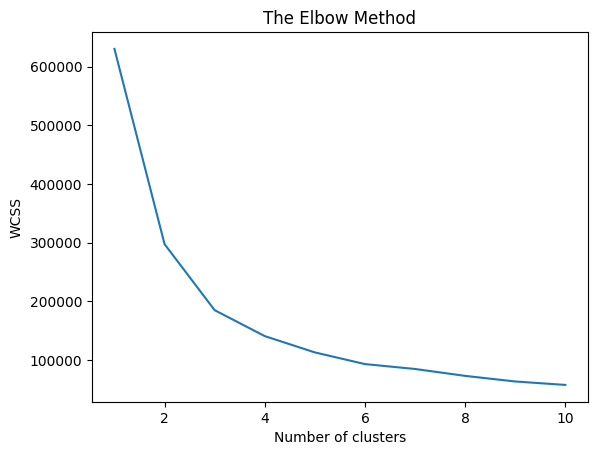

In [59]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
for k in range(2,8):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(data)
  label = kmeans.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

For cluster= 2, Silhouette Coefficient is 0.43973556345986037
For cluster= 3, Silhouette Coefficient is 0.4119164041002798
For cluster= 4, Silhouette Coefficient is 0.3716145695383779
For cluster= 5, Silhouette Coefficient is 0.39015234158711526
For cluster= 6, Silhouette Coefficient is 0.36030491748016663
For cluster= 7, Silhouette Coefficient is 0.3442167816629567


In [61]:
clustering_kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 12)

In [62]:
dtenrates['clusters'] = clustering_kmeans.fit_predict(data)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_14700\1461095908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtenrates['clusters'] = clustering_kmeans.fit_predict(data)


In [63]:
dtenrates.head(10)

,MSOA21CD,%_Owned,%_Social-rent,%_Private-rent,clusters
0,E02000002,41.884107,40.630295,14.130803,2
1,E02000003,53.174410,12.697640,29.117003,3
2,E02000004,64.614740,15.619765,15.745394,0
3,E02000005,49.933669,24.197400,20.668612,2
4,E02000007,38.267053,40.874375,15.854622,2
5,E02000008,42.307692,34.322742,18.875418,2
6,E02000009,35.515736,33.769814,26.510453,2
7,E02000010,42.288557,32.748025,20.836992,2
8,E02000011,52.676056,14.124748,27.323944,3
9,E02000012,64.700730,11.737226,19.270073,0


In [64]:
# Exporting file

# dtenrates.to_csv('tenuregroups-clusters.csv', index=False)

In [65]:
# cluster 0

dtc0 = dtenrates.loc[dtenrates['clusters'] == 0]

In [66]:
dtc0.describe()

,%_Owned,%_Social-rent,%_Private-rent,clusters
count,189.000000,189.000000,189.000000,189.0
mean,72.097858,8.057584,15.288149,0.0
std,7.545429,5.062612,4.813521,0.0
min,59.558824,1.273262,4.858300,0.0
25%,65.812842,4.180139,11.882353,0.0
50%,70.720854,6.893140,14.992126,0.0
75%,78.087530,11.388013,19.043348,0.0
max,89.454783,22.761760,26.353791,0.0


Mixed tenures

In [67]:
# cluster 1

dtc1 = dtenrates.loc[dtenrates['clusters'] == 1]

In [68]:
dtc1.describe()

,%_Owned,%_Social-rent,%_Private-rent,clusters
count,184.000000,184.000000,184.000000,184.0
mean,21.359541,43.067585,25.232745,1.0
std,5.458123,8.171489,5.732310,0.0
min,9.957567,26.921569,8.880442,1.0
25%,17.377354,37.117245,21.274891,1.0
50%,20.966806,41.761780,25.792045,1.0
75%,25.250985,47.888335,29.163144,1.0
max,35.469710,67.607906,39.139040,1.0


Mixed: %_owned and % Private-rent

In [69]:
# cluster 2

dtc2 = dtenrates.loc[dtenrates['clusters'] == 2]

In [70]:
dtc2.describe()

,%_Owned,%_Social-rent,%_Private-rent,clusters
count,145.000000,145.000000,145.000000,145.0
mean,42.151095,28.940364,21.967601,2.0
std,6.455595,5.384095,5.719170,0.0
min,29.343992,19.747990,8.479413,2.0
25%,37.877551,24.677716,18.904931,2.0
50%,42.155576,28.492849,22.879747,2.0
75%,45.808157,32.253440,26.195787,2.0
max,58.561644,45.004881,30.997552,2.0


% Private rented is more significant

In [71]:
# cluster 3

dtc3 = dtenrates.loc[dtenrates['clusters'] == 3]

In [72]:
dtc3.describe()

,%_Owned,%_Social-rent,%_Private-rent,clusters
count,241.000000,241.000000,241.000000,241.0
mean,51.739194,11.692603,29.991171,3.0
std,5.976035,4.592354,5.767700,0.0
min,41.270358,2.636419,15.749526,3.0
25%,47.071429,8.037335,26.538316,3.0
50%,51.423540,11.240439,29.779545,3.0
75%,56.805763,15.465898,33.314871,3.0
max,63.992674,21.537002,46.861650,3.0


% owned is more significant

In [73]:
# cluster 4

dtc4 = dtenrates.loc[dtenrates['clusters'] == 4]

In [74]:
dtc4.describe()

,%_Owned,%_Social-rent,%_Private-rent,clusters
count,243.000000,243.000000,243.000000,243.0
mean,30.179441,18.276977,37.614717,4.0
std,7.667458,6.838882,5.520933,0.0
min,11.361847,1.482365,22.201397,4.0
25%,24.768102,13.197493,33.109543,4.0
50%,30.997772,19.208809,37.539342,4.0
75%,36.662530,23.095472,41.546340,4.0
max,42.277339,32.024433,61.255327,4.0


% Social-rent is more significant (with %_Owned)

In [75]:
# cluster 5

# dtc5 = dtenrates.loc[dtenrates['clusters'] == 5]

## Encoding tenure

In [76]:
dtenrates.head()

,MSOA21CD,%_Owned,%_Social-rent,%_Private-rent,clusters
0,E02000002,41.884107,40.630295,14.130803,2
1,E02000003,53.174410,12.697640,29.117003,3
2,E02000004,64.614740,15.619765,15.745394,0
3,E02000005,49.933669,24.197400,20.668612,2
4,E02000007,38.267053,40.874375,15.854622,2


In [77]:
x = dtenrates.iloc[:,[0,4]].values

In [78]:
print(x)

[['E02000002' 2]
 ['E02000003' 3]
 ['E02000004' 0]
 ...
 ['E02000981' 4]
 ['E02000982' 1]
 ['E02000983' 1]]


In [79]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 1.0 0.0 0.0 'E02000002']
 [0.0 0.0 0.0 1.0 0.0 'E02000003']
 [1.0 0.0 0.0 0.0 0.0 'E02000004']
 ...
 [0.0 0.0 0.0 0.0 1.0 'E02000981']
 [0.0 1.0 0.0 0.0 0.0 'E02000982']
 [0.0 1.0 0.0 0.0 0.0 'E02000983']]


In [80]:
dte= pd.DataFrame(np.array(x), columns=['Mixed tenures','Owned & Private','More private rent','More owned','More social rent', 'MSOA21CD'])

In [81]:
dte.tail(20)

,Mixed tenures,Owned & Private,More private rent,More owned,More social rent,MSOA21CD
982,0.0,1.0,0.0,0.0,0.0,E02000964
983,0.0,0.0,0.0,0.0,1.0,E02000965
984,0.0,0.0,0.0,0.0,1.0,E02000966
985,0.0,0.0,0.0,0.0,1.0,E02000967
986,0.0,1.0,0.0,0.0,0.0,E02000968
987,0.0,1.0,0.0,0.0,0.0,E02000969
988,0.0,0.0,0.0,0.0,1.0,E02000970
989,0.0,0.0,0.0,0.0,1.0,E02000971
990,0.0,0.0,0.0,0.0,1.0,E02000972
991,0.0,0.0,0.0,0.0,1.0,E02000973


# Vacant dwellings

In [82]:
dvac = dtenr[['MSOA21CD', 'Empty %']]

In [83]:
dvac

,MSOA21CD,Empty %
0,E02000002,2.744832
1,E02000003,4.402822
2,E02000004,3.308208
3,E02000005,3.741045
4,E02000007,3.186726
...,...,...
997,E02000979,30.024947
998,E02000980,22.355899
999,E02000981,21.948930
1000,E02000982,24.121595


In [84]:
dvac.describe()

,Empty %
count,1002.000000
mean,7.215834
std,5.914781
min,1.903605
25%,3.988298
50%,5.634394
75%,8.017262
max,52.905095


<Axes: >

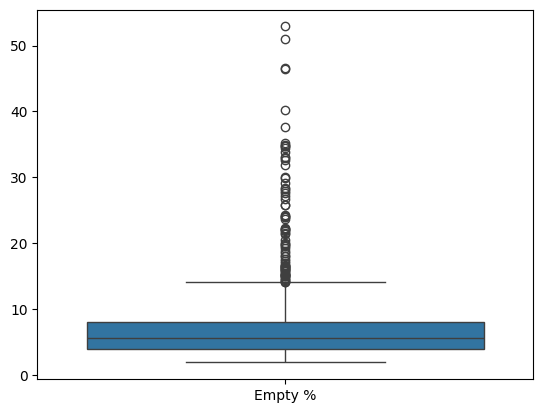

In [85]:
sns.boxplot(dvac)

In [86]:
dvac.loc[:,'Log10-vac'] = np.log10(dvac['Empty %'])

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_14700\2083201876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dvac.loc[:,'Log10-vac'] = np.log10(dvac['Empty %'])


In [87]:
dvac.head()

,MSOA21CD,Empty %,Log10-vac
0,E02000002,2.744832,0.438516
1,E02000003,4.402822,0.643731
2,E02000004,3.308208,0.519593
3,E02000005,3.741045,0.572993
4,E02000007,3.186726,0.503345


<Axes: ylabel='Log10-vac'>

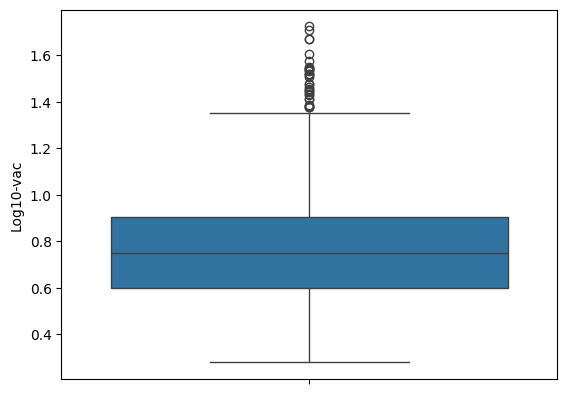

In [88]:
sns.boxplot(dvac['Log10-vac'])

In [89]:
dlv = dvac[['MSOA21CD','Log10-vac']]

In [90]:
dlv.head()

,MSOA21CD,Log10-vac
0,E02000002,0.438516
1,E02000003,0.643731
2,E02000004,0.519593
3,E02000005,0.572993
4,E02000007,0.503345


In [91]:
dlv.describe()

,Log10-vac
count,1002.000000
mean,0.775243
std,0.245874
min,0.279577
25%,0.600787
50%,0.750847
75%,0.904026
max,1.723497


In [92]:
# Exporting file

# dvac.to_csv('vacants.csv', index=False)

# Deprivation

In [93]:
depr = pd.read_csv('ts011-deprived.csv')

In [94]:
depr.head()

,MSOA21CD,not deprived,deprived-1,deprived-2,deprived-3,deprived-4
0,E02000002,954.0,1085.0,613.0,194.0,24.0
1,E02000003,1649.0,1467.0,667.0,145.0,2.0
2,E02000004,1014.0,829.0,365.0,98.0,3.0
3,E02000005,1544.0,1252.0,620.0,201.0,13.0
4,E02000007,1335.0,1320.0,739.0,265.0,16.0


In [95]:
depr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSOA21CD      1002 non-null   object 
 1   not deprived  1002 non-null   float64
 2   deprived-1    1002 non-null   float64
 3   deprived-2    1002 non-null   float64
 4   deprived-3    1002 non-null   float64
 5   deprived-4    1002 non-null   float64
dtypes: float64(5), object(1)
memory usage: 47.1+ KB


In [96]:
depr.describe()

,not deprived,deprived-1,deprived-2,deprived-3,deprived-4
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,1642.202595,1124.145709,492.113772,145.501996,13.111776
std,491.967024,243.903116,174.451729,78.346387,9.970059
min,556.000000,594.000000,113.000000,14.000000,0.000000
25%,1298.250000,948.250000,364.250000,85.250000,6.000000
50%,1598.000000,1099.000000,479.000000,135.000000,11.000000
75%,1946.000000,1262.000000,608.750000,192.000000,17.000000
max,4144.000000,2139.000000,1439.000000,760.000000,87.000000


In [97]:
deprivation = depr.merge(total, on= 'MSOA21CD')

In [98]:
deprivation.head()

,MSOA21CD,not deprived,deprived-1,deprived-2,deprived-3,deprived-4,Dwellings
0,E02000002,954.0,1085.0,613.0,194.0,24.0,2951.0
1,E02000003,1649.0,1467.0,667.0,145.0,2.0,4111.0
2,E02000004,1014.0,829.0,365.0,98.0,3.0,2388.0
3,E02000005,1544.0,1252.0,620.0,201.0,13.0,3769.0
4,E02000007,1335.0,1320.0,739.0,265.0,16.0,3797.0


### Percentages

In [99]:
cols = deprivation.columns.values[1:6]

In [100]:
cols

array(['not deprived', 'deprived-1', 'deprived-2', 'deprived-3',
       'deprived-4'], dtype=object)

In [101]:
d_new = percentage("Dwellings",cols,"%_",deprivation)

In [102]:
d_new.head()

,MSOA21CD,not deprived,deprived-1,deprived-2,deprived-3,deprived-4,Dwellings,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4
0,E02000002,954.0,1085.0,613.0,194.0,24.0,2951.0,32.328024,36.767198,20.772619,6.574043,0.813284
1,E02000003,1649.0,1467.0,667.0,145.0,2.0,4111.0,40.111895,35.684748,16.224763,3.527122,0.048650
2,E02000004,1014.0,829.0,365.0,98.0,3.0,2388.0,42.462312,34.715243,15.284757,4.103853,0.125628
3,E02000005,1544.0,1252.0,620.0,201.0,13.0,3769.0,40.965773,33.218360,16.449987,5.332980,0.344919
4,E02000007,1335.0,1320.0,739.0,265.0,16.0,3797.0,35.159336,34.764288,19.462734,6.979194,0.421385


d_new.info()

In [103]:
print(d_new.columns.values[7:12])

['%_not deprived' '%_deprived-1' '%_deprived-2' '%_deprived-3'
 '%_deprived-4']


In [104]:
# deprivation percentages df

dep_p = d_new[['MSOA21CD', '%_not deprived', '%_deprived-1', '%_deprived-2', '%_deprived-3', '%_deprived-4']]

In [105]:
dep_p.head()

,MSOA21CD,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4
0,E02000002,32.328024,36.767198,20.772619,6.574043,0.813284
1,E02000003,40.111895,35.684748,16.224763,3.527122,0.048650
2,E02000004,42.462312,34.715243,15.284757,4.103853,0.125628
3,E02000005,40.965773,33.218360,16.449987,5.332980,0.344919
4,E02000007,35.159336,34.764288,19.462734,6.979194,0.421385


In [106]:
dep_p.describe()

,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,44.285146,30.728424,13.477532,3.943338,0.348978
std,8.672406,4.281388,4.260459,1.941080,0.240850
min,22.703156,11.330721,1.925371,0.340774,0.000000
25%,37.800436,28.110333,10.292179,2.387475,0.172064
50%,43.924691,31.229909,13.469592,3.700489,0.305261
75%,50.883941,33.974029,16.722956,5.258280,0.477366
max,66.540233,39.873418,23.496855,11.715739,1.456632


### Visualisations

<Axes: >

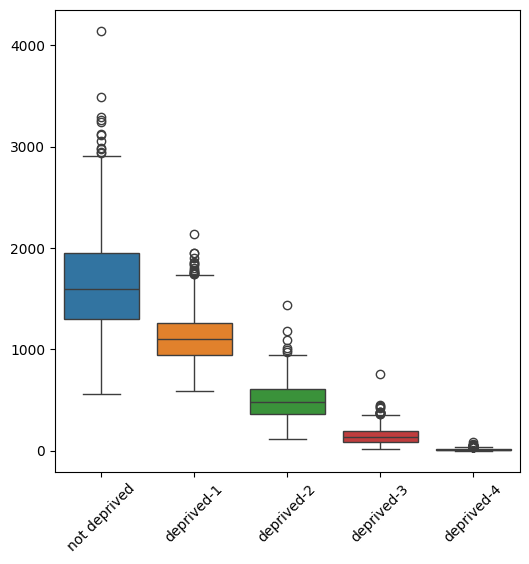

In [107]:
fig, axes = plt.subplots(figsize=(6,6))
plt.xticks(rotation=45)
sns.boxplot(depr)

<Axes: >

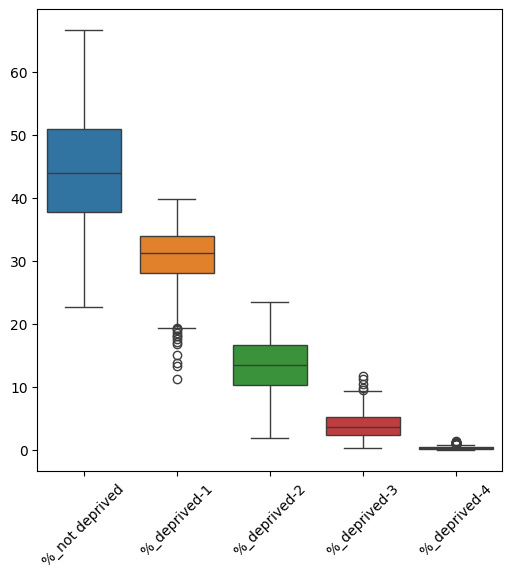

In [108]:
fig, axes = plt.subplots(figsize=(6,6))
plt.xticks(rotation=45)
sns.boxplot(dep_p)

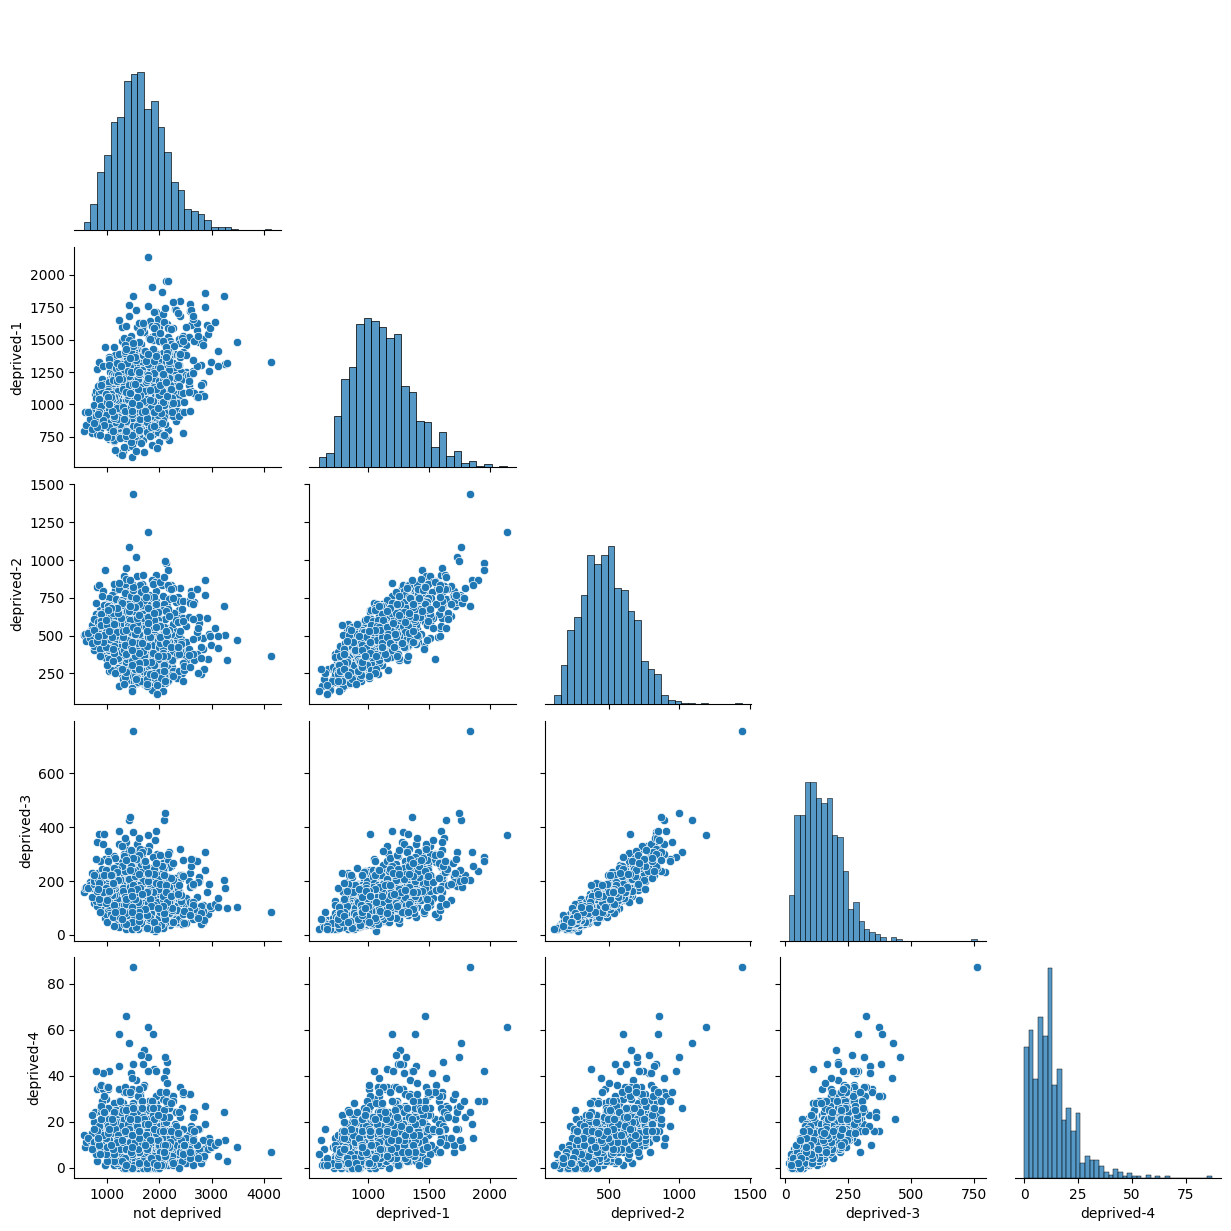

In [109]:
# COUNTS

sns.pairplot(depr, kind='scatter', corner=True)

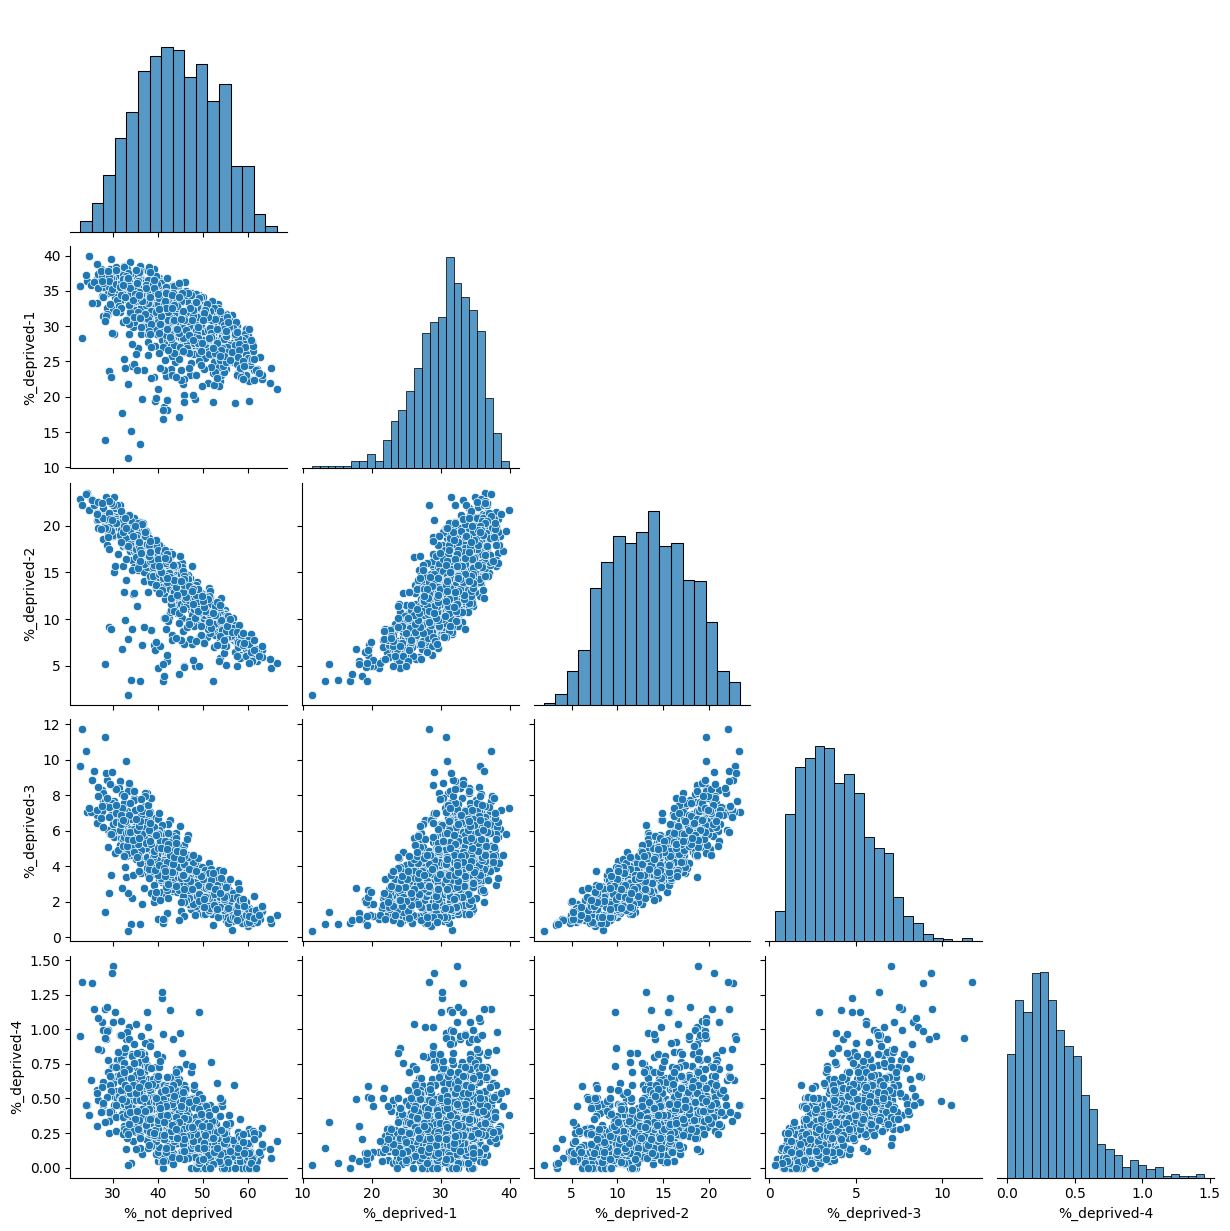

In [110]:
# Percentages

sns.pairplot(dep_p, kind='scatter', corner=True)

#### Correlations between percentages of deprivation 

In [111]:
dep_num = dep_p.select_dtypes(include= ['float64'])

In [112]:
corr_dep = dep_num.corr()

<Axes: >

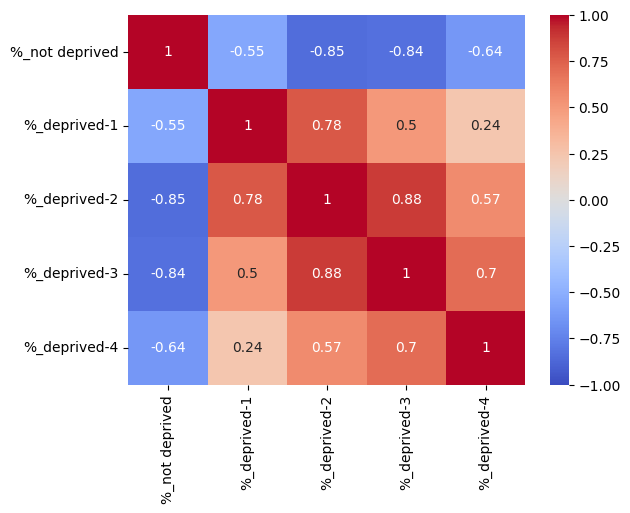

In [113]:
sns.heatmap(corr_dep, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

In [114]:
# Exporting file

# dep_p.to_csv('deprivation-rates.csv', index=False)

## Clusters deprivation

In [115]:
X = dep_num.values

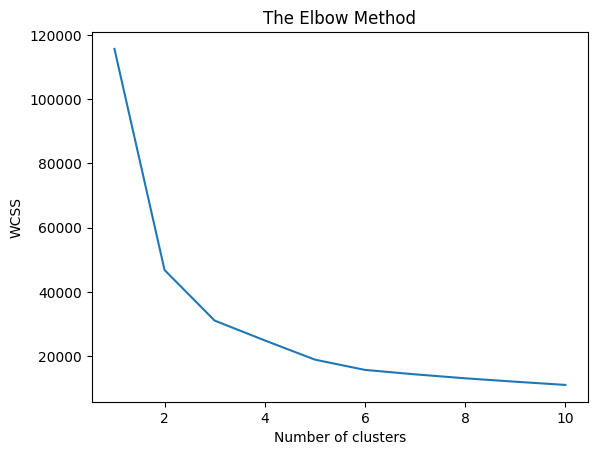

In [116]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [117]:
for k in range(2,8):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(dep_num)
  label = kmeans.labels_
  sil_coeff = silhouette_score(dep_num,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

For cluster= 2, Silhouette Coefficient is 0.48985073884251085
For cluster= 3, Silhouette Coefficient is 0.40725245889679024
For cluster= 4, Silhouette Coefficient is 0.3509586119050978
For cluster= 5, Silhouette Coefficient is 0.3770796379645793
For cluster= 6, Silhouette Coefficient is 0.35035391681742195
For cluster= 7, Silhouette Coefficient is 0.3051473112037822


In [118]:
clustering_kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 12)

In [119]:
dep_p['clusters'] = clustering_kmeans.fit_predict(dep_num)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_14700\535009319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_p['clusters'] = clustering_kmeans.fit_predict(dep_num)


In [120]:
dep_p.head(10)

,MSOA21CD,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4,clusters
0,E02000002,32.328024,36.767198,20.772619,6.574043,0.813284,1
1,E02000003,40.111895,35.684748,16.224763,3.527122,0.048650,2
2,E02000004,42.462312,34.715243,15.284757,4.103853,0.125628,2
3,E02000005,40.965773,33.218360,16.449987,5.332980,0.344919,2
4,E02000007,35.159336,34.764288,19.462734,6.979194,0.421385,1
5,E02000008,32.316054,36.141304,21.258361,6.396321,0.543478,1
6,E02000009,36.250861,36.756260,18.630829,5.789111,0.298645,1
7,E02000010,35.674568,36.318408,18.554287,6.175007,0.643840,1
8,E02000011,36.378270,36.700201,17.424547,3.621730,0.523139,1
9,E02000012,40.700730,33.430657,17.664234,3.912409,0.262774,2


In [121]:
# cluster 0

dpc0 = dep_p.loc[dep_p['clusters'] == 0]

In [122]:
dpc0.describe()

,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4,clusters
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,56.422243,26.762151,8.339150,1.841476,0.154044,0.0
std,3.202641,2.818476,1.600896,0.694405,0.116067,0.0
min,49.204577,19.076358,3.345160,0.414815,0.000000,0.0
25%,54.077136,24.760144,7.258822,1.263975,0.071694,0.0
50%,55.578062,26.856576,8.489160,1.763317,0.126523,0.0
75%,58.686273,28.924866,9.491486,2.270784,0.215598,0.0
max,66.540233,31.674208,12.262321,3.758131,0.611995,0.0


In [123]:
# cluster 1

dpc1 = dep_p.loc[dep_p['clusters'] == 1]

In [124]:
dpc1.describe()

,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4,clusters
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.0
mean,32.424693,35.023157,19.346035,6.519569,0.567859,1.0
std,3.210478,2.166769,1.731614,1.330565,0.254486,0.0
min,22.703156,28.287344,14.132977,3.408495,0.120337,1.0
25%,30.358540,33.689143,18.152048,5.642040,0.385642,1.0
50%,32.895291,35.281498,19.282977,6.395152,0.519059,1.0
75%,35.203361,36.530169,20.570165,7.164454,0.664958,1.0
max,37.068966,39.873418,23.496855,11.715739,1.456632,1.0


In [125]:
# cluster 2

dpc2 = dep_p.loc[dep_p['clusters'] == 2]

In [126]:
dpc2.describe()

,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4,clusters
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.0
mean,40.716031,32.543710,15.516600,4.705385,0.415737,2.0
std,2.467834,2.518806,1.467008,1.131932,0.210760,0.0
min,34.366353,26.096166,12.163778,2.201087,0.022983,2.0
25%,38.618141,30.767125,14.440079,3.890967,0.265341,2.0
50%,40.716662,32.757033,15.568729,4.613492,0.371107,2.0
75%,42.726945,34.408437,16.588637,5.351710,0.531305,2.0
max,45.469049,38.366112,19.616359,8.121827,1.270815,2.0


In [127]:
# cluster 3

dpc3 = dep_p.loc[dep_p['clusters'] == 3]

In [128]:
dpc3.describe()

,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4,clusters
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.0
mean,48.588976,30.265244,11.860955,3.066321,0.263516,3.0
std,2.456165,2.403330,1.435430,0.929552,0.167933,0.0
min,42.713876,23.155113,7.312966,1.305556,0.000000,3.0
25%,46.619460,28.315129,10.822581,2.401303,0.148354,3.0
50%,48.605421,30.530002,11.796460,3.037523,0.236762,3.0
75%,50.486193,32.047462,12.955252,3.693282,0.344716,3.0
max,53.784327,36.235438,15.628892,5.893186,1.120667,3.0


In [129]:
# cluster 4

dpc4 = dep_p.loc[dep_p['clusters'] == 4]

In [130]:
dpc4.describe()

,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4,clusters
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,40.034230,21.693622,7.800133,2.497828,0.338167,4.0
std,5.186408,3.593134,2.724465,1.188535,0.212613,0.0
min,28.246892,11.330721,1.925371,0.340774,0.000000,4.0
25%,36.066086,19.541764,5.509369,1.560509,0.159460,4.0
50%,41.400204,22.764267,7.803233,2.480529,0.341373,4.0
75%,43.916447,24.137287,9.738707,3.354226,0.460205,4.0
max,48.234429,26.605798,12.948262,4.812354,0.861498,4.0


In [131]:
# Exporting file

# dep_p.to_csv('deprivation-clusters.csv', index=False)

## Encoding deprivation

In [132]:
dep_p.head()

,MSOA21CD,%_not deprived,%_deprived-1,%_deprived-2,%_deprived-3,%_deprived-4,clusters
0,E02000002,32.328024,36.767198,20.772619,6.574043,0.813284,1
1,E02000003,40.111895,35.684748,16.224763,3.527122,0.048650,2
2,E02000004,42.462312,34.715243,15.284757,4.103853,0.125628,2
3,E02000005,40.965773,33.218360,16.449987,5.332980,0.344919,2
4,E02000007,35.159336,34.764288,19.462734,6.979194,0.421385,1


In [133]:
x = dep_p.iloc[:,[0,6]].values

In [134]:
print(x)

[['E02000002' 1]
 ['E02000003' 2]
 ['E02000004' 2]
 ...
 ['E02000981' 4]
 ['E02000982' 4]
 ['E02000983' 4]]


In [135]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 0.0 0.0 0.0 'E02000002']
 [0.0 0.0 1.0 0.0 0.0 'E02000003']
 [0.0 0.0 1.0 0.0 0.0 'E02000004']
 ...
 [0.0 0.0 0.0 0.0 1.0 'E02000981']
 [0.0 0.0 0.0 0.0 1.0 'E02000982']
 [0.0 0.0 0.0 0.0 1.0 'E02000983']]


In [136]:
dpe= pd.DataFrame(np.array(x), columns=['Most deprived','Mixed extremes','Mixed less deprived',
                                        'Mixed most deprived','Less deprived', 'MSOA21CD'])

In [137]:
dpe.head(10)

,Most deprived,Mixed extremes,Mixed less deprived,Mixed most deprived,Less deprived,MSOA21CD
0,0.0,1.0,0.0,0.0,0.0,E02000002
1,0.0,0.0,1.0,0.0,0.0,E02000003
2,0.0,0.0,1.0,0.0,0.0,E02000004
3,0.0,0.0,1.0,0.0,0.0,E02000005
4,0.0,1.0,0.0,0.0,0.0,E02000007
5,0.0,1.0,0.0,0.0,0.0,E02000008
6,0.0,1.0,0.0,0.0,0.0,E02000009
7,0.0,1.0,0.0,0.0,0.0,E02000010
8,0.0,1.0,0.0,0.0,0.0,E02000011
9,0.0,0.0,1.0,0.0,0.0,E02000012


# Accommodation type

In [138]:
dat = pd.read_csv('accommodationtype.csv')

In [139]:
dat.head()

,MSOA21CD,Houses,Flats,Other
0,E02000002,1723,1099,48
1,E02000003,2654,998,277
2,E02000004,1983,269,57
3,E02000005,3115,368,145
4,E02000007,2172,1436,69


In [140]:
dat.describe()

,Houses,Flats,Other
count,1002.000000,1002.000000,1002.000000
mean,1568.698603,1377.360279,470.964072
std,820.357854,947.236277,427.959791
min,42.000000,39.000000,11.000000
25%,916.500000,636.250000,150.000000
50%,1626.000000,1167.500000,310.500000
75%,2210.500000,1901.750000,667.250000
max,3902.000000,5086.000000,2360.000000


In [141]:
datype = dat.merge(total, on= 'MSOA21CD')

In [142]:
datype.head()

,MSOA21CD,Houses,Flats,Other,Dwellings
0,E02000002,1723,1099,48,2951.0
1,E02000003,2654,998,277,4111.0
2,E02000004,1983,269,57,2388.0
3,E02000005,3115,368,145,3769.0
4,E02000007,2172,1436,69,3797.0


### Percentages

In [143]:
colus = datype.columns.values[1:4]
colus

array(['Houses', 'Flats', 'Other'], dtype=object)

In [144]:
d_new = percentage("Dwellings",colus,"%_",datype)

In [145]:
d_new.head()

,MSOA21CD,Houses,Flats,Other,Dwellings,%_Houses,%_Flats,%_Other
0,E02000002,1723,1099,48,2951.0,58.386987,37.241613,1.626567
1,E02000003,2654,998,277,4111.0,64.558502,24.276332,6.738020
2,E02000004,1983,269,57,2388.0,83.040201,11.264657,2.386935
3,E02000005,3115,368,145,3769.0,82.647917,9.763863,3.847174
4,E02000007,2172,1436,69,3797.0,57.203055,37.819331,1.817224


In [146]:
print(d_new.columns.values[5:8])

['%_Houses' '%_Flats' '%_Other']


In [147]:
datp = d_new[['MSOA21CD','%_Houses','%_Flats','%_Other']]

In [148]:
datp.head(3)

,MSOA21CD,%_Houses,%_Flats,%_Other
0,E02000002,58.386987,37.241613,1.626567
1,E02000003,64.558502,24.276332,6.738020
2,E02000004,83.040201,11.264657,2.386935


In [149]:
datp.describe()

,%_Houses,%_Flats,%_Other
count,1002.000000,1002.000000,1002.000000
mean,45.377961,35.138001,12.265911
std,25.266661,19.555609,10.222073
min,0.685043,1.315789,0.490196
25%,23.360426,20.214320,4.425829
50%,46.094752,32.328772,8.718114
75%,66.834175,46.527893,17.858183
max,95.782726,84.961873,52.352941


In [150]:
datp.loc[datp['%_Houses'].idxmax()]

MSOA21CD    E02000153
%_Houses    95.782726
%_Flats      1.315789
%_Other      0.607287
Name: 151, dtype: object

Bromley 027 (South East London)

In [151]:
datp.loc[datp['%_Flats'].idxmax()]

MSOA21CD    E02006928
%_Houses     5.869835
%_Flats     84.961873
%_Other      2.518177
Name: 344, dtype: object

Greenwich 035 (Between Deptford, the river Thames and the Cutty Sark)

In [152]:
datp.loc[datp['%_Other'].idxmax()]

MSOA21CD    E02000432
%_Houses    17.810458
%_Flats      21.24183
%_Other     52.352941
Name: 440, dtype: object

Haringey 036 (West side of Finsbury Park)

### Visualisations

<Axes: >

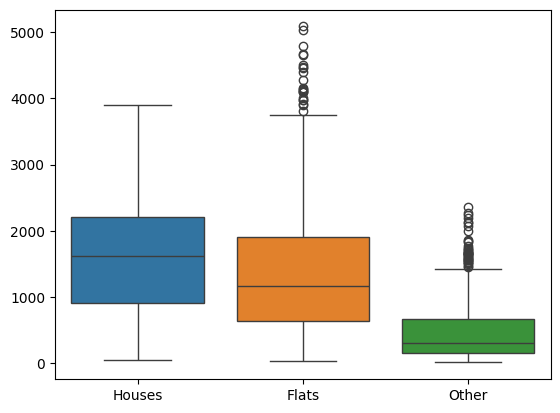

In [153]:
# Counts

sns.boxplot(dat)

<Axes: >

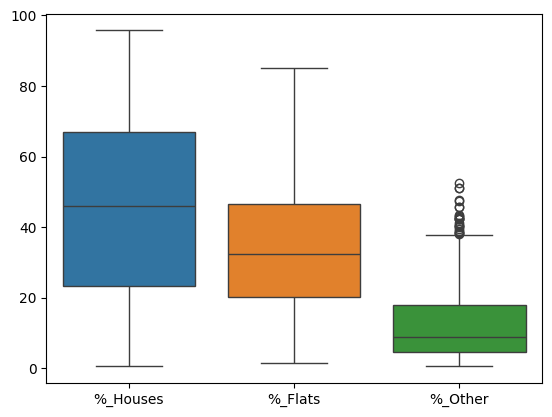

In [154]:
# Percentages
 
#plt.xticks(rotation=45)
sns.boxplot(datp)

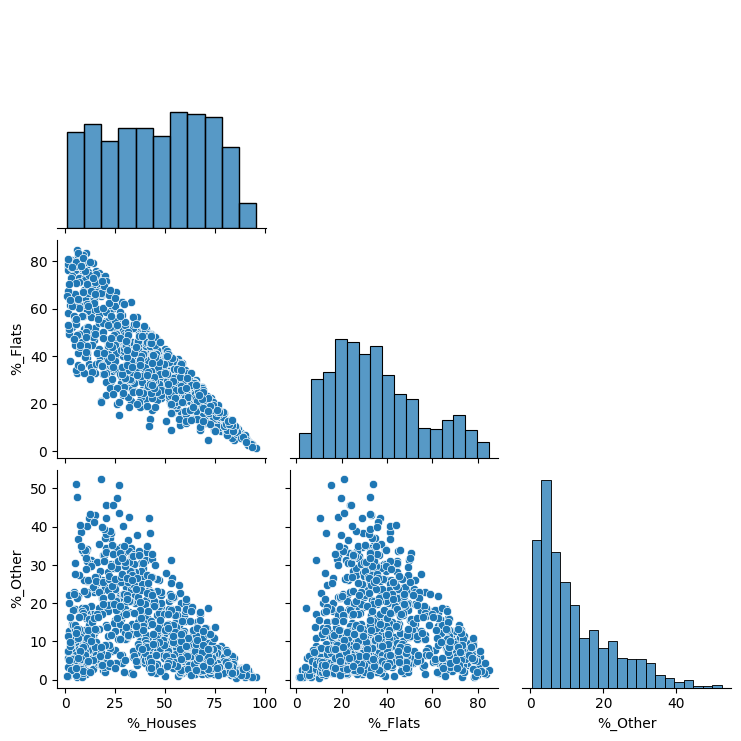

In [155]:
sns.pairplot(datp, kind='scatter', corner=True)

#### Correlations between percentages of accommodation type 

In [156]:
datp_num = datp.select_dtypes(include= ['float64'])

In [157]:
corr_datp = datp_num.corr()

In [158]:
corr_datp

,%_Houses,%_Flats,%_Other
%_Houses,1.000000,-0.864774,-0.473397
%_Flats,-0.864774,1.000000,0.021995
%_Other,-0.473397,0.021995,1.000000


<Axes: >

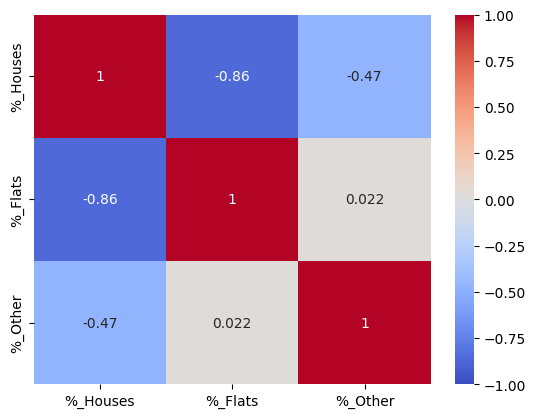

In [159]:
sns.heatmap(corr_datp, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

Percentages of households living in:
- Houses and flats have a strong negative correlation.
- Houses and other have a moderate negative correlation.
- Flats and other have no correlation.

In [160]:
# Exporting file

# datp.to_csv('accommodation-rates.csv', index=False)

### Clusters

In [161]:
X = datp_num.values

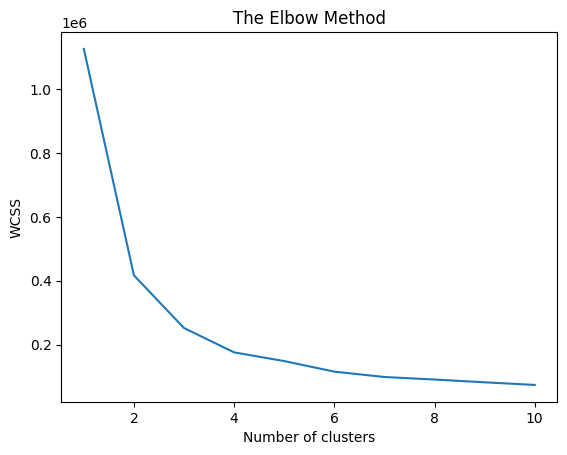

In [162]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [163]:
for k in range(2,8):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(datp_num)
  label = kmeans.labels_
  sil_coeff = silhouette_score(datp_num,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

For cluster= 2, Silhouette Coefficient is 0.521885666612177
For cluster= 3, Silhouette Coefficient is 0.48071748662782604
For cluster= 4, Silhouette Coefficient is 0.45069813557449495
For cluster= 5, Silhouette Coefficient is 0.4190719428115209
For cluster= 6, Silhouette Coefficient is 0.4231161348749263
For cluster= 7, Silhouette Coefficient is 0.38168424810083584


In [164]:
clustering_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 12)

In [165]:
datp['clusters'] = clustering_kmeans.fit_predict(datp_num)

C:\Users\Ana Cuba\AppData\Local\Temp\ipykernel_14700\1465609715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datp['clusters'] = clustering_kmeans.fit_predict(datp_num)


In [166]:
datp.head()

,MSOA21CD,%_Houses,%_Flats,%_Other,clusters
0,E02000002,58.386987,37.241613,1.626567,0
1,E02000003,64.558502,24.276332,6.738020,0
2,E02000004,83.040201,11.264657,2.386935,0
3,E02000005,82.647917,9.763863,3.847174,0
4,E02000007,57.203055,37.819331,1.817224,0


In [167]:
# cluster 0

datc0 = datp.loc[datp['clusters'] == 0]

In [168]:
datc0.describe()

,%_Houses,%_Flats,%_Other,clusters
count,432.000000,432.000000,432.000000,432.0
mean,70.072552,19.020803,6.591527,0.0
std,10.505546,8.245969,5.185006,0.0
min,49.935567,1.315789,0.490196,0.0
25%,61.005120,12.420206,2.994928,0.0
50%,69.381552,18.792370,5.041449,0.0
75%,77.845136,24.752222,8.319859,0.0
max,95.782726,39.011748,31.405421,0.0


In [169]:
# cluster 1

datc1 = datp.loc[datp['clusters'] == 1]

In [170]:
datc1.describe()

,%_Houses,%_Flats,%_Other,clusters
count,206.000000,206.000000,206.000000,206.0
mean,11.825992,65.622351,10.662273,1.0
std,7.159907,10.237939,7.431404,0.0
min,0.685043,36.195489,0.655996,1.0
25%,6.281183,57.475656,4.971143,1.0
50%,10.595510,66.827464,8.562722,1.0
75%,16.047961,73.314674,14.475354,1.0
max,33.975054,84.961873,33.784149,1.0


In [171]:
# cluster 2

datc2 = datp.loc[datp['clusters'] == 2]

In [172]:
datc2.describe()

,%_Houses,%_Flats,%_Other,clusters
count,364.000000,364.000000,364.000000,364.0
mean,35.058296,37.013971,19.907899,2.0
std,11.361363,8.636658,11.255814,0.0
min,5.358436,10.403685,0.819022,2.0
25%,27.578006,31.861248,10.373761,2.0
50%,36.370241,37.145292,19.226888,2.0
75%,44.101933,43.306406,28.095812,2.0
max,53.710526,56.536697,52.352941,2.0


In [173]:
# datp.to_csv('accommodation-clusters.csv', index=False)

## Encoding accommodation types

In [174]:
datp.head()

,MSOA21CD,%_Houses,%_Flats,%_Other,clusters
0,E02000002,58.386987,37.241613,1.626567,0
1,E02000003,64.558502,24.276332,6.738020,0
2,E02000004,83.040201,11.264657,2.386935,0
3,E02000005,82.647917,9.763863,3.847174,0
4,E02000007,57.203055,37.819331,1.817224,0


In [175]:
x = datp.iloc[:,[0,4]].values

In [176]:
print(x)

[['E02000002' 0]
 ['E02000003' 0]
 ['E02000004' 0]
 ...
 ['E02000981' 2]
 ['E02000982' 1]
 ['E02000983' 1]]


In [177]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[1.0 0.0 0.0 'E02000002']
 [1.0 0.0 0.0 'E02000003']
 [1.0 0.0 0.0 'E02000004']
 ...
 [0.0 0.0 1.0 'E02000981']
 [0.0 1.0 0.0 'E02000982']
 [0.0 1.0 0.0 'E02000983']]


In [178]:
dacte= pd.DataFrame(np.array(x), columns=['Mainly flats','Mainly houses','Mixed types','MSOA21CD'])

In [179]:
dacte.head(10)

,Mainly flats,Mainly houses,Mixed types,MSOA21CD
0,1.0,0.0,0.0,E02000002
1,1.0,0.0,0.0,E02000003
2,1.0,0.0,0.0,E02000004
3,1.0,0.0,0.0,E02000005
4,1.0,0.0,0.0,E02000007
5,1.0,0.0,0.0,E02000008
6,1.0,0.0,0.0,E02000009
7,1.0,0.0,0.0,E02000010
8,1.0,0.0,0.0,E02000011
9,1.0,0.0,0.0,E02000012


# New dataframe with encoded columns

In [180]:
dfes = [dte, dlv, dpe, dacte]

In [181]:
newdfe = reduce(lambda  left,right: pd.merge(left,right,on=['MSOA21CD'],
                                            how='outer'), dfes)

In [182]:
newdfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mixed tenures        1002 non-null   object 
 1   Owned & Private      1002 non-null   object 
 2   More private rent    1002 non-null   object 
 3   More owned           1002 non-null   object 
 4   More social rent     1002 non-null   object 
 5   MSOA21CD             1002 non-null   object 
 6   Log10-vac            1002 non-null   float64
 7   Most deprived        1002 non-null   object 
 8   Mixed extremes       1002 non-null   object 
 9   Mixed less deprived  1002 non-null   object 
 10  Mixed most deprived  1002 non-null   object 
 11  Less deprived        1002 non-null   object 
 12  Mainly flats         1002 non-null   object 
 13  Mainly houses        1002 non-null   object 
 14  Mixed types          1002 non-null   object 
dtypes: float64(1), object(14)
memory usage

In [183]:
newdfe.head()

,Mixed tenures,Owned & Private,More private rent,More owned,More social rent,MSOA21CD,Log10-vac,Most deprived,Mixed extremes,Mixed less deprived,Mixed most deprived,Less deprived,Mainly flats,Mainly houses,Mixed types
0,0.0,0.0,0.0,0.0,1.0,E02000001,1.517148,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,E02000002,0.438516,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,E02000003,0.643731,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,E02000004,0.519593,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,E02000005,0.572993,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [184]:
# Exporting file

# newdfe.to_csv('enc-vars.csv', index=False)